In [1]:

import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
import matplotlib.pyplot as plt


In [2]:
os.system('sudo blobfuse /home/azureuser/cloudfiles/code/blobfuse/sidewalk --tmp-path=/mnt/resource/blobfusetmp --config-file=/home/azureuser/cloudfiles/code/blobfuse/fuse_connection_sidewalk.cfg -o attr_timeout=3600 -o entry_timeout=3600 -o negative_timeout=3600 -o allow_other -o nonempty')

0

In [73]:
CH_Osdorp = pd.read_csv('/home/azureuser/cloudfiles/code/blobfuse/sidewalk/processed_data/route_planning/curb_heights/curbs_and_heights_Osdorp-Midden.csv', index_col=[0])
clean_polygons = gpd.read_file("/home/azureuser/cloudfiles/code/blobfuse/sidewalk/processed_data/crossings_project/cleaning output/Osdorp/final CW polygons 27-05.shp")
clean_polygons = clean_polygons.drop(columns=['FID'])

In [47]:
# Abstract linestrings from curbs and heights csv and transform to LineStrings
lines = []
for line in CH_Osdorp['geometry']:
    lines.append(loads(line))

# Turn into a gdf
lines_gdf = gpd.GeoDataFrame(geometry=lines)

In [53]:
pol_line = []
match_dicts = []

# Loop over clean polygons
for cw_ind, cw_row in clean_polygons.iterrows():

    matches = []
    indexes =[]

    polygon = cw_row['geometry']

    # Loop over lines
    for ind_line, row_line in lines_gdf.iterrows():

        line = row_line['geometry']

        # Check if the polygon intersects with the line
        if polygon.intersects(line):
            indexes.append(ind_line)
            matches.append(line)

    # Create dictionary of found matches
    match_dict = {
        'CW polygon': polygon,
        'line matches': matches,
        'line indexes': indexes
    }

    # Add polygon and matches dict to the full dictionary list
    match_dicts.append(match_dict)

# Turn list of dictionaries into a dataframe
intersection_df = pd.DataFrame(match_dicts)

In [67]:
def plot_linematches(polygon, lines):

    # Plot the polygon
    plt.plot(*polygon.exterior.xy, color='blue', linewidth=1)

    # Plot the lines
    for line in lines:
        plt.plot(*line.xy, color='red', linewidth=1)

    # Show the plot
    plt.show()

POLYGON ((114124.895 486257.13999999996, 114124.88715862877 486257.14038522186, 114124.87939277424 486257.14153717755, 114124.87177722582 486257.1434447731, 114124.86438532542 486257.14608963736, 114124.85728826106 486257.14944629883, 114124.85055438137 486257.15348243096, 114124.84424853727 486257.1581591637, 114124.83843145751 486257.1634314575, 114124.81643145751 486257.18543145753, 114124.81115916374 486257.1912485373, 114124.80648243103 486257.1975543814, 114124.80244629885 486257.20428826107, 114124.79908963741 486257.2113853254, 114124.7600896374 486257.3053853254, 114124.75744477315 486257.3127772258, 114124.68544477315 486257.5677772258, 114122.26844477314 486266.17477722577, 114122.26653717757 486266.1823927742, 114122.26538522186 486266.19015862874, 114122.265 486266.198, 114122.26538522186 486266.2058413712, 114122.26653717757 486266.21360722574, 114122.26844477314 486266.2212227742, 114122.2710896374 486266.2286146746, 114122.27444629885 486266.23571173893, 114122.27848243

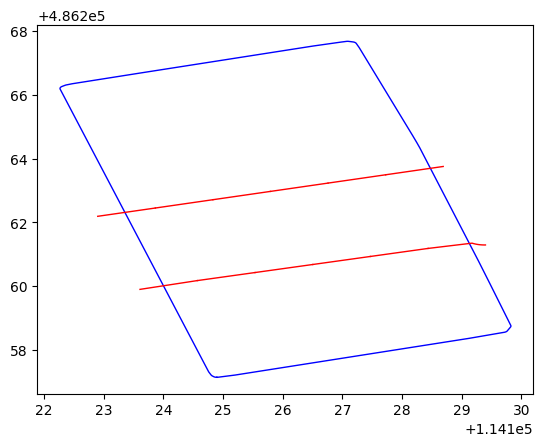

POLYGON ((114562.168 484937.581, 114562.16015862877 484937.5813852219, 114562.15239277424 484937.5825371776, 114562.14477722583 484937.58444477315, 114562.13738532542 484937.5870896374, 114562.13028826106 484937.5904462989, 114562.12355438137 484937.594482431, 114562.09355438137 484937.613482431, 114562.08724853727 484937.61815916374, 114562.08143145751 484937.6234314575, 114562.07615916374 484937.62924853724, 114562.07148243103 484937.63555438136, 114562.02448243102 484937.71255438135, 114562.02044629885 484937.719288261, 114562.00444629884 484937.75128826103, 114562.0010896374 484937.7583853254, 114561.99844477314 484937.7657772258, 114561.97744477315 484937.8277772258, 114561.72444477315 484938.5922772258, 114561.59544477315 484938.9927772258, 114560.46244477315 484942.5207772258, 114559.21644477315 484946.51677722577, 114559.21453717757 484946.5243927742, 114559.18753717757 484946.65639277425, 114559.15753717757 484946.8393927742, 114559.15638522187 484946.84715862875, 114559.15338

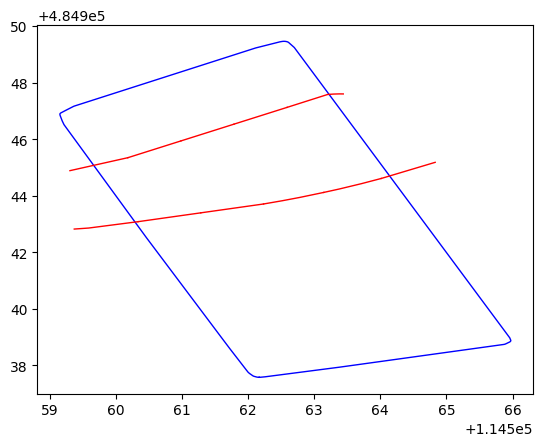

POLYGON ((114571.87 484954.886, 114571.86215862876 484954.8863852219, 114571.85439277423 484954.8875371776, 114571.84677722582 484954.88944477314, 114571.83938532541 484954.8920896374, 114571.83228826105 484954.8954462989, 114571.82555438136 484954.899482431, 114571.81924853726 484954.90415916377, 114571.8134314575 484954.9094314575, 114571.76643145751 484954.9524314575, 114571.76115916374 484954.95824853727, 114571.75648243102 484954.9645543814, 114571.75244629885 484954.97128826106, 114571.70544629885 484955.05428826105, 114571.69144629885 484955.08228826104, 114571.6880896374 484955.0893853254, 114571.68544477315 484955.0967772258, 114571.08344477315 484956.9647772258, 114570.33244477314 484959.3287772258, 114570.23944477315 484959.67477722577, 114570.23753717757 484959.6823927742, 114570.05053717757 484960.46239277424, 114570.04938522186 484960.47015862877, 114570.049 484960.478, 114570.04938522186 484960.48584137124, 114570.05053717757 484960.49360722577, 114570.05244477314 484960

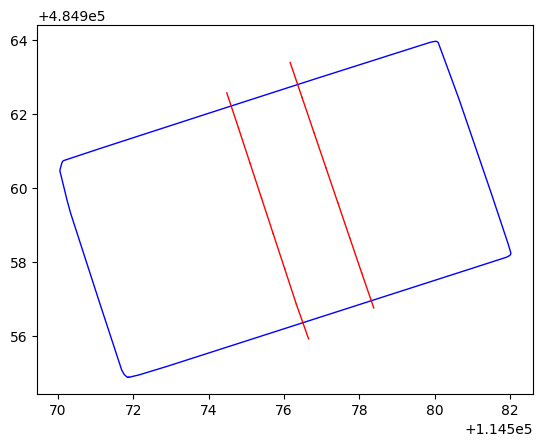

POLYGON ((114403.637 485549.90599999996, 114403.62915862877 485549.90638522187, 114403.56215862877 485549.9133852219, 114403.55439277424 485549.9145371776, 114403.54677722583 485549.91644477315, 114403.53938532542 485549.9190896374, 114403.53228826106 485549.9224462989, 114403.52555438137 485549.926482431, 114403.51924853727 485549.93115916377, 114403.51343145751 485549.9364314575, 114403.50815916374 485549.94224853726, 114403.43815916374 485550.0297485373, 114403.43348243102 485550.0360543814, 114403.42944629885 485550.0427882611, 114403.4260896374 485550.0498853254, 114403.42344477314 485550.05727722583, 114403.36044477315 485550.25427722576, 114402.78494477314 485552.0982772258, 114397.80044477314 485568.3087772258, 114397.74444477314 485568.51327722584, 114397.74253717756 485568.5208927743, 114397.72953717757 485568.6003927742, 114397.72838522187 485568.60815862875, 114397.728 485568.616, 114397.72838522187 485568.6238413712, 114397.72953717757 485568.63160722575, 114397.7314447731

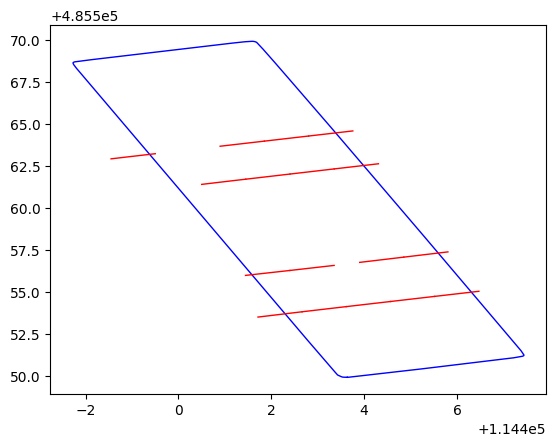

POLYGON ((114373.418 485566.43, 114373.41015862877 485566.4303852219, 114373.40239277424 485566.4315371776, 114373.39477722583 485566.43344477314, 114373.38738532542 485566.4360896374, 114373.38028826106 485566.4394462989, 114373.37355438137 485566.443482431, 114373.36724853727 485566.44815916376, 114373.36143145751 485566.4534314575, 114373.35615916374 485566.45924853726, 114373.35148243103 485566.4655543814, 114373.34744629885 485566.47228826105, 114373.34408963741 485566.4793853254, 114373.34144477315 485566.4867772258, 114372.90644477314 485567.7907772258, 114372.68544477315 485568.4757772258, 114372.48344477314 485569.1147772258, 114371.88644477315 485571.0207772258, 114371.72244477314 485571.5507772258, 114371.56044477315 485572.0827772258, 114371.53744477314 485572.1657772258, 114371.53553717757 485572.17339277425, 114371.53438522186 485572.1811586288, 114371.534 485572.189, 114371.53438522186 485572.19684137125, 114371.53553717757 485572.2046072258, 114371.53744477314 485572.21

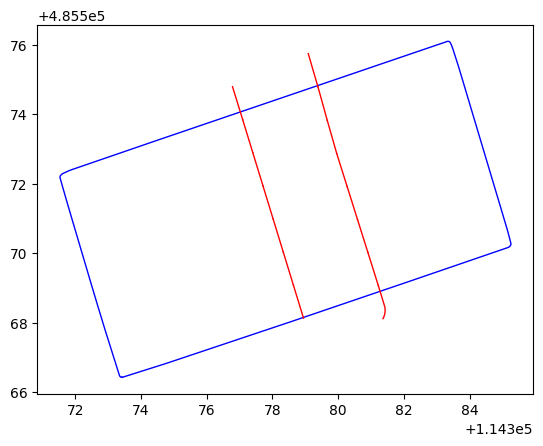

POLYGON ((114280.261 485947.80799999996, 114280.25315862877 485947.80838522187, 114280.24539277423 485947.80953717756, 114280.23777722582 485947.8114447731, 114280.23038532541 485947.81408963737, 114280.22328826106 485947.81744629884, 114280.21655438136 485947.82148243097, 114280.21024853726 485947.8261591637, 114280.2044314575 485947.8314314575, 114280.19915916373 485947.8372485372, 114280.19448243102 485947.84355438134, 114280.19044629885 485947.850288261, 114280.1870896374 485947.85738532536, 114280.14708963741 485947.9613853254, 114280.14444477315 485947.9687772258, 114278.91544477314 485951.9917772258, 114278.91353717756 485951.99939277425, 114278.91238522186 485952.0071586288, 114278.90638522187 485952.0931586288, 114278.906 485952.101, 114278.90638522187 485952.10884137126, 114278.90753717757 485952.1166072258, 114278.90944477315 485952.12422277423, 114278.91208963741 485952.13161467464, 114278.91544629885 485952.138711739, 114278.91948243103 485952.14544561866, 114278.924159163

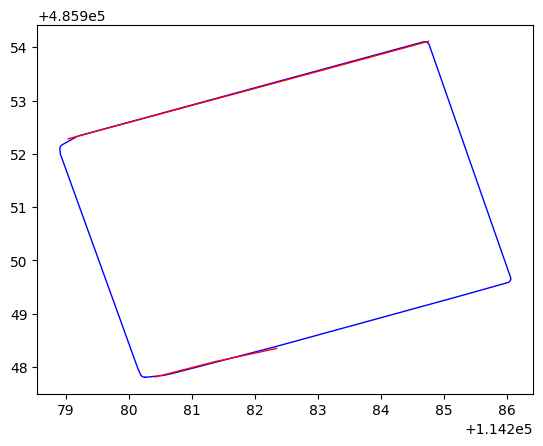

POLYGON ((114278.312 485954.664, 114278.30415862877 485954.6643852219, 114278.29639277424 485954.6655371776, 114278.28877722583 485954.66744477313, 114278.13077722582 485954.7174447731, 114278.12338532541 485954.7200896374, 114278.11628826105 485954.72344629886, 114278.10955438136 485954.727482431, 114278.10324853726 485954.73215916374, 114278.0974314575 485954.7374314575, 114278.09215916373 485954.74324853724, 114278.06215916373 485954.7772485372, 114278.05748243102 485954.78355438134, 114278.05344629884 485954.790288261, 114278.0500896374 485954.79738532536, 114278.0340896374 485954.8373853254, 114277.9925896374 485954.9488853254, 114277.98994477314 485954.9562772258, 114277.08344477315 485957.9362772258, 114277.08153717757 485957.94389277423, 114277.08038522187 485957.95165862876, 114277.07038522186 485958.02715862874, 114277.06138522187 485958.11315862875, 114277.061 485958.121, 114277.06138522187 485958.1288413712, 114277.06253717757 485958.13660722575, 114277.06444477315 485958.1

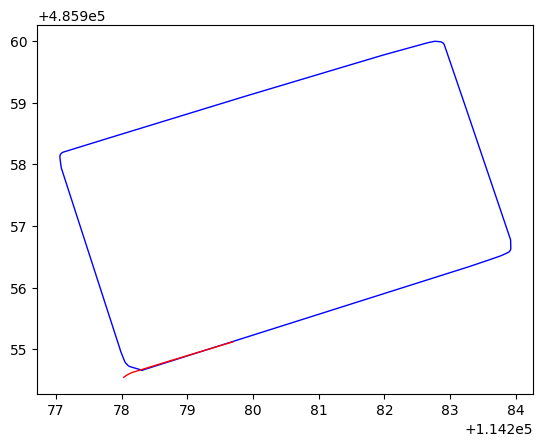

POLYGON ((114577.133 484907.435, 114577.12515862877 484907.4353852219, 114577.11739277423 484907.4365371776, 114577.10977722582 484907.43844477314, 114577.10238532542 484907.4410896374, 114577.09528826106 484907.4444462989, 114577.08855438136 484907.448482431, 114577.08224853726 484907.45315916376, 114577.0764314575 484907.4584314575, 114569.0554314575 484915.6234314575, 114569.05015916373 484915.62924853724, 114569.00015916374 484915.68924853724, 114568.99548243103 484915.69555438135, 114568.99144629885 484915.70228826103, 114568.98808963741 484915.7093853254, 114568.93908963741 484915.8203853254, 114568.93644477315 484915.8277772258, 114565.86244477314 484925.38677722577, 114565.36644477314 484926.9567772258, 114565.23844477315 484927.3627772258, 114565.23653717757 484927.37039277423, 114565.23538522187 484927.37815862877, 114565.235 484927.386, 114565.23538522187 484927.39384137123, 114565.23653717757 484927.40160722577, 114565.23844477315 484927.4092227742, 114565.2410896374 484927

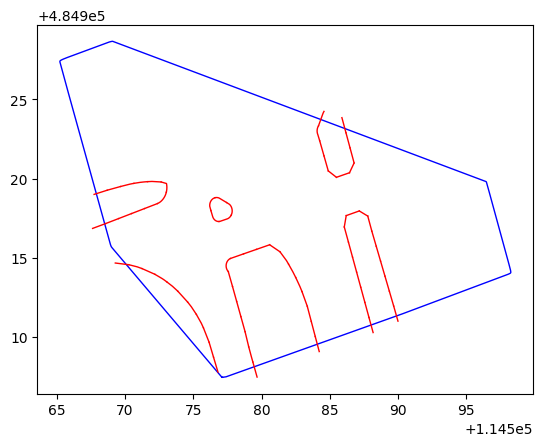

POLYGON ((114605.474 484928.355, 114605.46615862877 484928.3553852219, 114605.45839277424 484928.3565371776, 114605.45077722582 484928.3584447731, 114605.44338532542 484928.3610896374, 114605.43628826106 484928.36444629886, 114605.42955438136 484928.368482431, 114605.39555438136 484928.389482431, 114605.38924853726 484928.39415916376, 114605.3834314575 484928.3994314575, 114605.37815916374 484928.40524853725, 114605.37348243102 484928.41155438137, 114605.36944629885 484928.41828826105, 114605.3660896374 484928.4253853254, 114605.36344477315 484928.4327772258, 114605.03144477314 484929.4097772258, 114600.96244477315 484941.4707772258, 114600.96053717757 484941.47839277424, 114600.95938522187 484941.4861586288, 114600.959 484941.494, 114600.95938522187 484941.50184137124, 114600.97238522186 484941.64684137126, 114600.97353717756 484941.6546072258, 114600.97544477314 484941.66222277423, 114600.9780896374 484941.66961467464, 114600.98144629884 484941.676711739, 114600.98548243102 484941.68

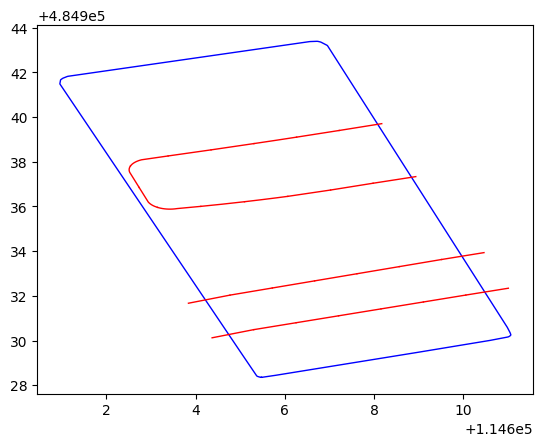

POLYGON ((114599.588 484946.374, 114599.58015862877 484946.3743852219, 114599.57239277424 484946.3755371776, 114599.56477722582 484946.37744477316, 114599.55738532542 484946.3800896374, 114599.55028826106 484946.3834462989, 114599.54355438137 484946.387482431, 114599.53724853726 484946.3921591638, 114599.53143145751 484946.39743145753, 114599.4684314575 484946.4644314575, 114599.46315916373 484946.47024853725, 114599.45848243101 484946.47655438137, 114599.45444629884 484946.48328826105, 114599.4510896374 484946.4903853254, 114599.3750896374 484946.6523853254, 114599.34958963741 484946.7073853254, 114599.34694477315 484946.7147772258, 114599.31344477314 484946.8097772258, 114597.84394477314 484951.37577722577, 114596.93844477314 484954.2187772258, 114596.74594477315 484954.85227722576, 114596.63444477314 484955.2437772258, 114596.63253717756 484955.2513927742, 114596.63138522186 484955.25915862876, 114596.631 484955.267, 114596.63138522186 484955.2748413712, 114596.63253717756 484955.28

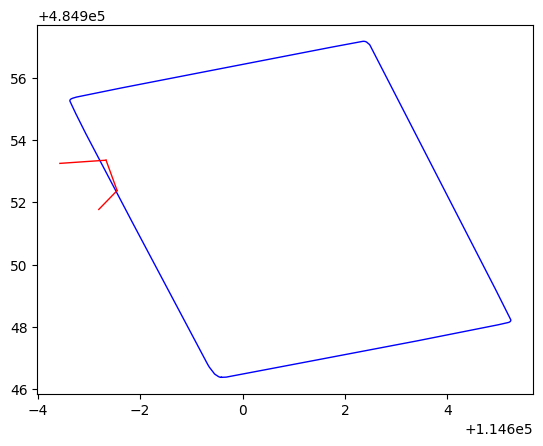

POLYGON ((114671.08 484954.69299999997, 114671.07215862877 484954.6933852219, 114671.06439277423 484954.69453717757, 114671.05677722582 484954.6964447731, 114671.04938532542 484954.6990896374, 114671.04228826106 484954.70244629885, 114671.03555438136 484954.706482431, 114671.02924853726 484954.71115916374, 114671.0234314575 484954.7164314575, 114671.01815916374 484954.72224853723, 114671.01348243102 484954.72855438135, 114670.98698243103 484954.77055438136, 114670.98294629886 484954.77728826104, 114670.97958963741 484954.7843853254, 114670.97694477315 484954.7917772258, 114670.57244477315 484956.0147772258, 114670.32144477314 484956.8577772258, 114670.31953717757 484956.8653927742, 114670.31838522186 484956.87315862876, 114670.318 484956.881, 114670.317 484956.902, 114670.317 484956.921, 114670.31738522186 484956.9288413712, 114670.31938522187 484956.9668413712, 114670.32053717757 484956.97460722574, 114670.32653717756 484957.0086072258, 114670.33053717756 484957.02660722577, 114670.33

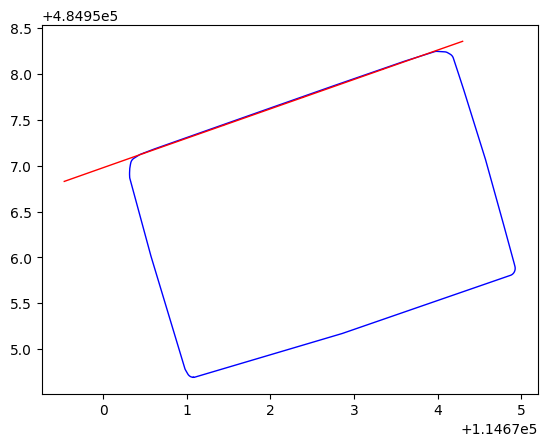

POLYGON ((114979.425 485060.494, 114979.41715862877 485060.4943852219, 114979.40939277424 485060.4955371776, 114979.40177722582 485060.49744477315, 114979.39438532542 485060.5000896374, 114979.38728826106 485060.5034462989, 114979.38055438137 485060.507482431, 114979.21455438137 485060.61548243096, 114979.20824853727 485060.6201591637, 114979.20243145751 485060.6254314575, 114979.19715916374 485060.6312485372, 114979.19248243103 485060.63755438133, 114979.18844629885 485060.644288261, 114979.18508963741 485060.65138532536, 114979.18244477315 485060.65877722576, 114978.32044477314 485063.77777722577, 114978.31853717756 485063.7853927742, 114978.31738522186 485063.79315862875, 114978.317 485063.801, 114978.31738522186 485063.8088413712, 114978.31853717756 485063.81660722574, 114978.32044477314 485063.8242227742, 114978.33544477314 485063.8782227742, 114978.3380896374 485063.8856146746, 114978.34144629884 485063.89271173894, 114978.34548243102 485063.8994456186, 114978.35015916373 485063.

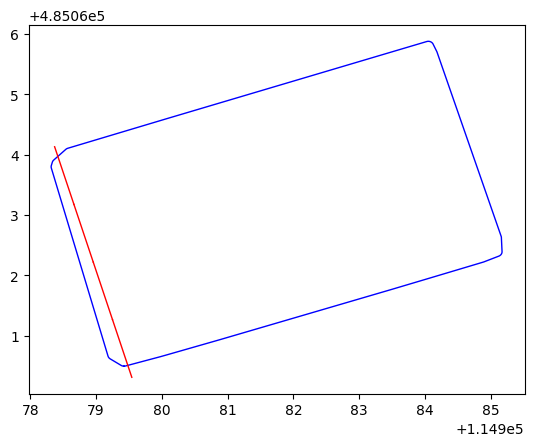

POLYGON ((114977.237 485067.576, 114977.22915862876 485067.5763852219, 114977.21315862877 485067.5783852219, 114977.20539277424 485067.5795371776, 114977.19777722583 485067.5814447731, 114977.19038532542 485067.5840896374, 114977.18328826106 485067.58744629886, 114977.17655438137 485067.591482431, 114977.17024853727 485067.59615916375, 114977.16443145751 485067.6014314575, 114977.15915916374 485067.60724853724, 114977.09015916374 485067.6887485373, 114977.08548243102 485067.6950543814, 114977.08144629885 485067.70178826107, 114977.0780896374 485067.7088853254, 114977.07544477315 485067.7162772258, 114976.04344477314 485070.94077722577, 114974.75144477314 485075.0797772258, 114974.49744477314 485075.9397772258, 114974.49553717756 485075.9473927742, 114974.49438522186 485075.95515862876, 114974.49399999999 485075.963, 114974.49438522186 485075.9708413712, 114974.49938522186 485076.00784137123, 114974.50053717756 485076.01560722577, 114974.50244477314 485076.0232227742, 114974.5050896374 

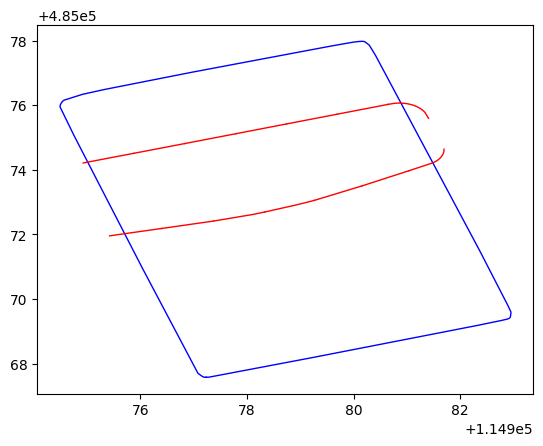

POLYGON ((114952.693 485186.847, 114952.68515862877 485186.8473852219, 114952.49215862877 485186.8713852219, 114952.48439277423 485186.8725371776, 114952.47677722582 485186.87444477313, 114952.46938532541 485186.8770896374, 114952.46228826106 485186.88044629886, 114952.45555438136 485186.884482431, 114952.44924853726 485186.88915916375, 114952.4434314575 485186.8944314575, 114952.43815916374 485186.90024853725, 114952.43348243102 485186.90655438136, 114952.42944629885 485186.91328826104, 114952.4260896374 485186.9203853254, 114952.3680896374 485187.0563853254, 114952.36544477314 485187.0637772258, 114951.29344477314 485190.3827772258, 114950.66144477314 485192.3807772258, 114950.65953717756 485192.3883927742, 114950.65838522186 485192.39615862875, 114950.64538522187 485192.50315862877, 114950.645 485192.511, 114950.64538522187 485192.51884137123, 114950.64653717757 485192.52660722577, 114950.64844477315 485192.5342227742, 114950.65108963741 485192.5416146746, 114950.65444629885 485192.

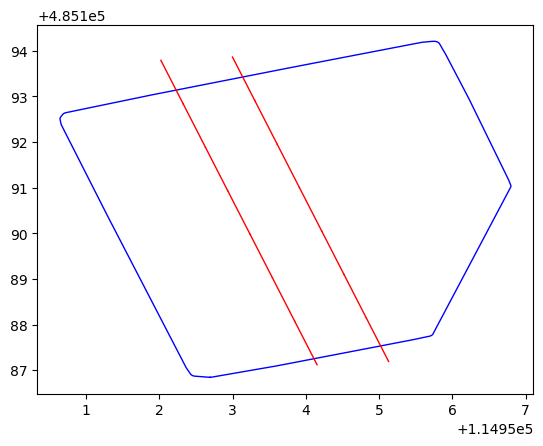

POLYGON ((114905.317 485344.974, 114905.30915862876 485344.9743852219, 114905.30139277423 485344.9755371776, 114905.29377722582 485344.97744477313, 114905.28638532541 485344.9800896374, 114905.27928826105 485344.98344629887, 114905.27255438136 485344.987482431, 114905.26624853726 485344.99215916375, 114905.2604314575 485344.9974314575, 114905.25515916373 485345.00324853725, 114905.25048243102 485345.00955438137, 114905.24644629884 485345.01628826105, 114905.2430896374 485345.0233853254, 114905.24044477314 485345.0307772258, 114905.15944477315 485345.2637772258, 114904.84044477314 485346.21277722577, 114904.42944477314 485347.5027772258, 114903.71744477314 485349.7577772258, 114903.60044477314 485350.1867772258, 114903.59853717756 485350.19439277425, 114903.59738522186 485350.2021586288, 114903.597 485350.21, 114903.59738522186 485350.21784137125, 114903.59853717756 485350.2256072258, 114903.60044477314 485350.23322277423, 114903.6030896374 485350.24061467464, 114903.64008963741 485350.

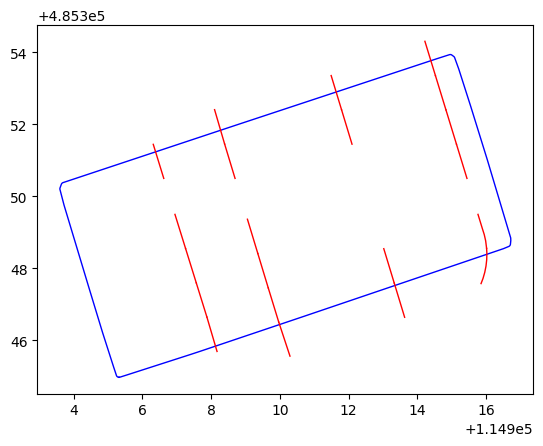

POLYGON ((114890.719 485707.037, 114890.71115862876 485707.0373852219, 114890.70339277423 485707.0385371776, 114890.69577722582 485707.04044477316, 114890.68838532541 485707.0430896374, 114890.68128826105 485707.0464462989, 114890.67455438136 485707.050482431, 114890.66824853726 485707.0551591638, 114890.6624314575 485707.06043145753, 114890.65715916373 485707.0662485373, 114890.65248243102 485707.0725543814, 114890.64844629884 485707.07928826107, 114890.6450896374 485707.0863853254, 114890.6340896374 485707.1163853254, 114890.63144477314 485707.1237772258, 114890.26244477315 485708.2782772258, 114888.09644477314 485715.07177722576, 114887.78844477315 485716.11477722577, 114887.74444477314 485716.2827772258, 114887.74253717756 485716.2903927742, 114887.74138522186 485716.29815862875, 114887.741 485716.306, 114887.74138522186 485716.3138413712, 114887.74253717756 485716.32160722575, 114887.74444477314 485716.3292227742, 114887.7470896374 485716.3366146746, 114887.75044629884 485716.3437

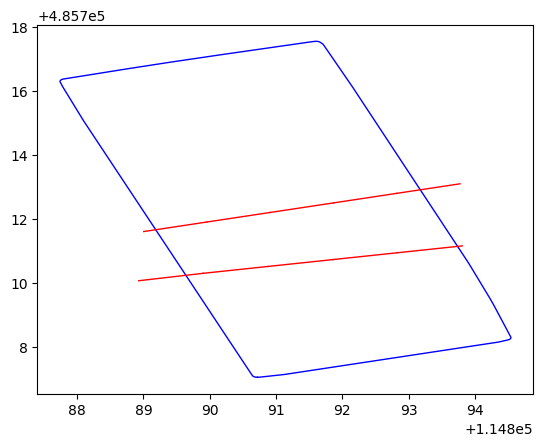

POLYGON ((115012.4267840141 485069.6467898855, 115010.853323784 485075.0047794554, 115015.9086615192 485076.6249817177, 115016.65611911129 485071.917303002, 115012.4267840141 485069.6467898855))


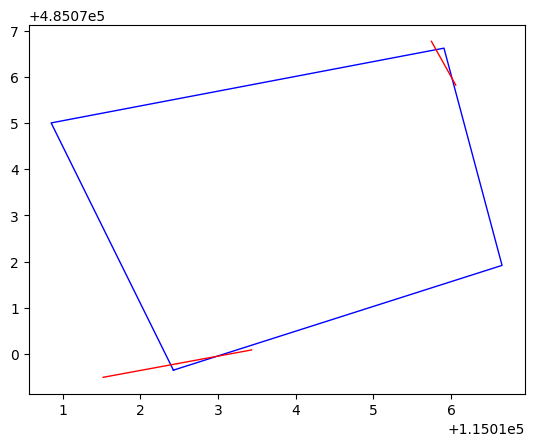

POLYGON ((115009.61108071584 485077.4185659605, 115006.79157712369 485086.8406383826, 115012.75601211376 485088.8620380481, 115016.5446302816 485080.26371984096, 115015.0961701927 485078.9338857705, 115009.61108071584 485077.4185659605))


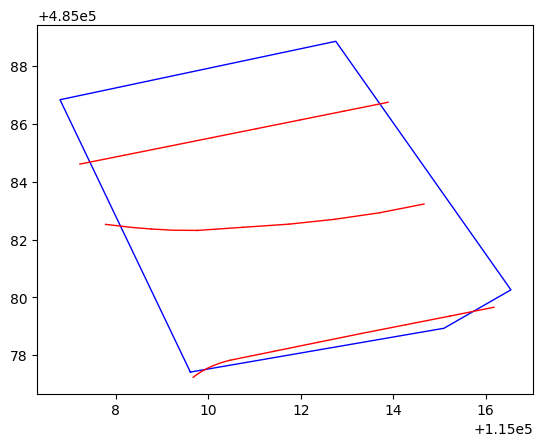

POLYGON ((115107.179 485089.086, 115107.17115862877 485089.0863852219, 115107.16339277424 485089.0875371776, 115107.15577722582 485089.08944477316, 115107.14838532542 485089.0920896374, 115107.14128826106 485089.0954462989, 115107.06628826106 485089.1344462989, 115107.05955438137 485089.138482431, 115107.05324853727 485089.14315916377, 115107.02424853726 485089.16715916374, 115107.0184314575 485089.1724314575, 115107.01315916373 485089.17824853724, 115107.00848243102 485089.18455438135, 115107.00444629884 485089.19128826103, 115107.0010896374 485089.1983853254, 115106.99844477314 485089.2057772258, 115106.69244477314 485090.0897772258, 115106.55744477315 485090.4947772258, 115101.14644477314 485107.10844389244, 115101.09244477314 485107.3027772258, 115101.03894477314 485107.4997772258, 115101.03703717756 485107.5073927742, 115101.03153717757 485107.5353927742, 115101.03038522186 485107.54315862875, 115101.03 485107.551, 115101.03038522186 485107.5588413712, 115101.03153717757 485107.56

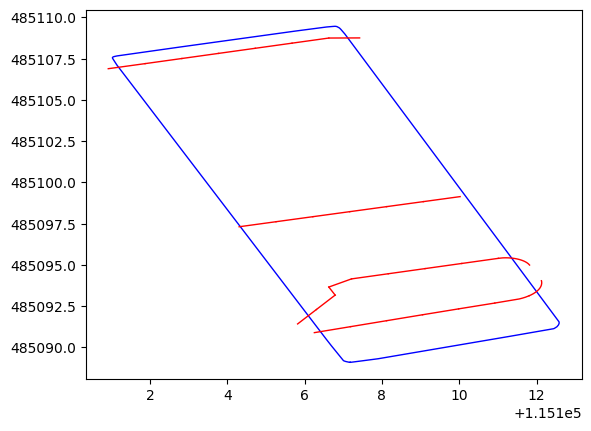

In [68]:
for ind, row in intersection_df.iterrows():
    if len(row['line matches']) > 0:
        print(row['CW polygon'])
        plot_linematches(row['CW polygon'], row['line matches'])

In [78]:
# Buffer the polygons to find sidewalk
buffed_pols = []

for ind, row in clean_polygons.iterrows():
    buffed_pols.append(row['geometry'].buffer(0.5))

clean_pols_buffed = clean_polygons.copy()
clean_pols_buffed['buffed polygons'] = buffed_pols

In [80]:
pol_line_buffed = []
match_dicts_buffed = []

# Maybe use this to grow the polygons that are not big enough? Grow them until both sides that should meet a sidewalk intersect with a sidewalk
# In case when using the buffer does not lead to a sidewalk on both sides

# Loop over clean polygons
for cw_ind, cw_row in clean_pols_buffed.iterrows():

    matches = []
    indexes =[]

    polygon = cw_row['buffed polygons']

    # Loop over lines
    for ind_line, row_line in lines_gdf.iterrows():

        line = row_line['geometry']

        # Check if the polygon intersects with the line
        if polygon.intersects(line):
            indexes.append(ind_line)
            matches.append(line)

    # Create dictionary of found matches
    match_dict = {
        'CW polygon': polygon,
        'line matches': matches,
        'line indexes': indexes
    }

    # Add polygon and matches dict to the full dictionary list
    match_dicts_buffed.append(match_dict)

# Turn list of dictionaries into a dataframe
intersection_buffed_df = pd.DataFrame(match_dicts_buffed)

6


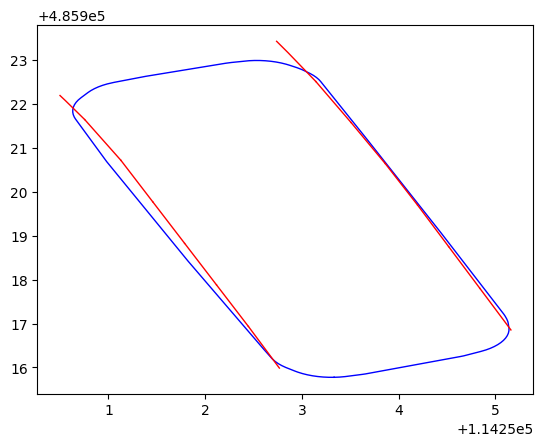

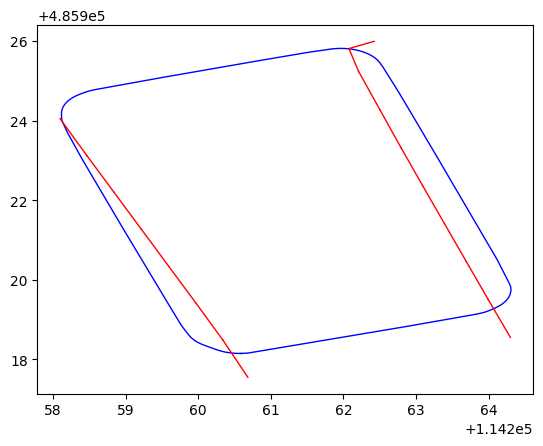

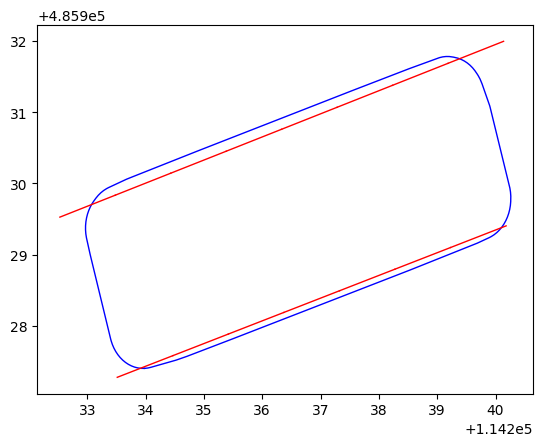

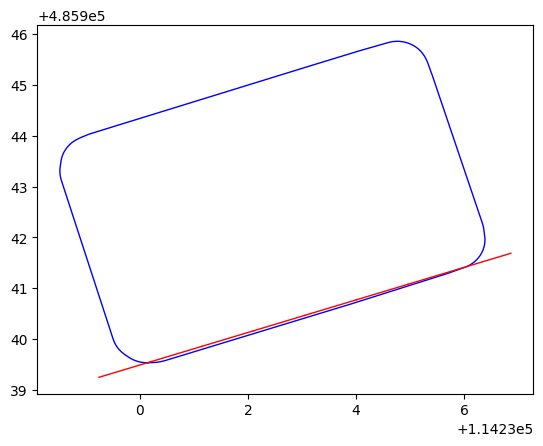

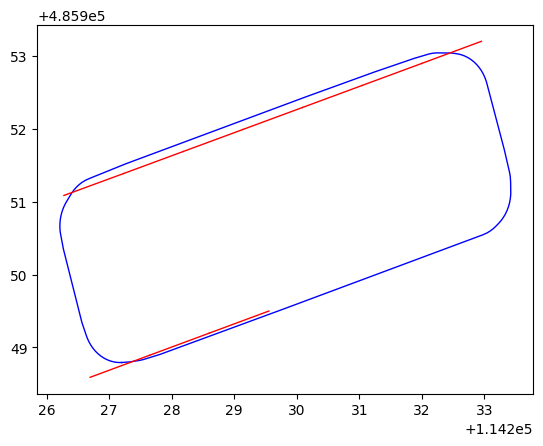

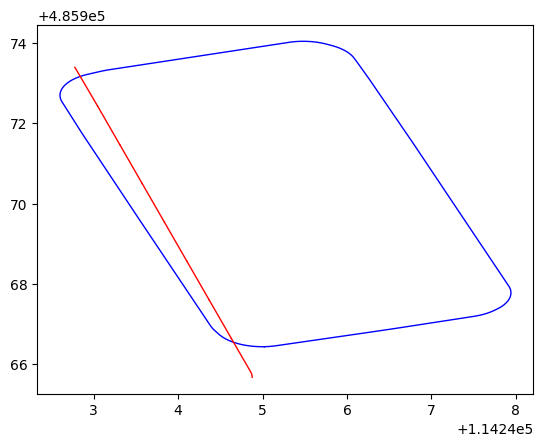

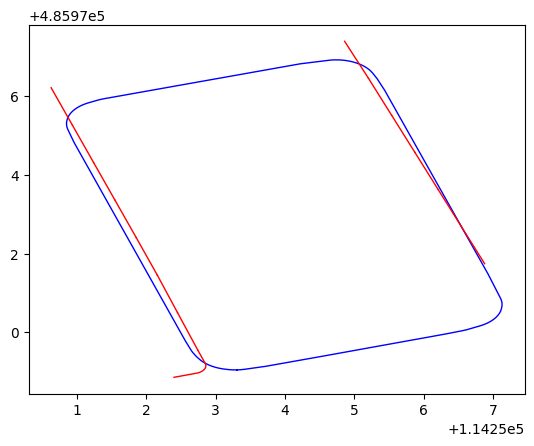

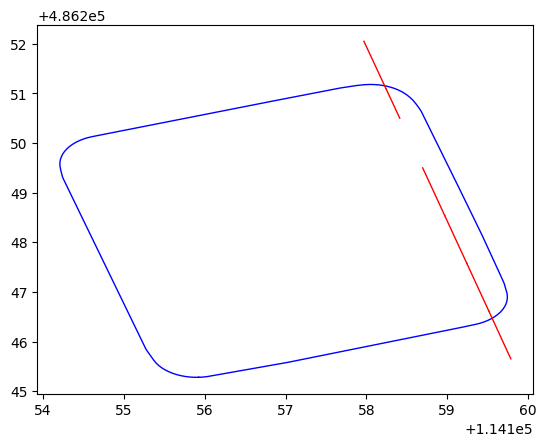

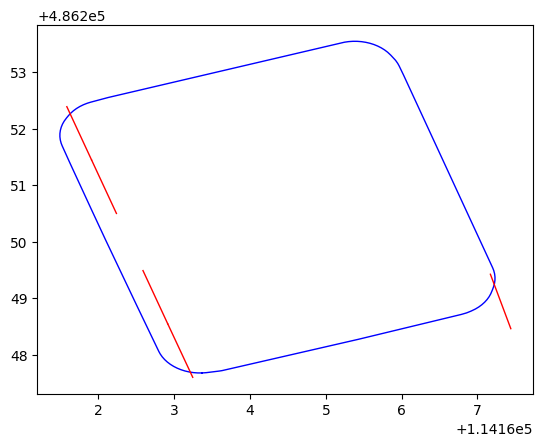

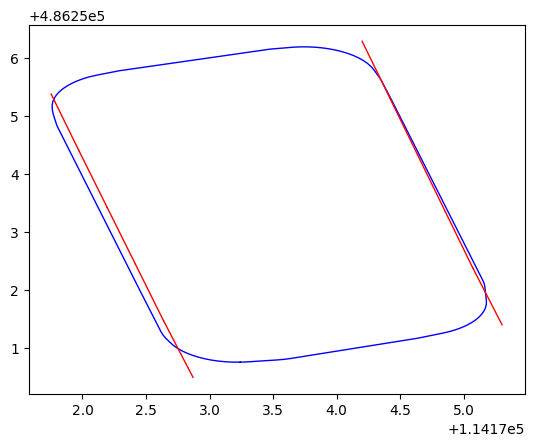

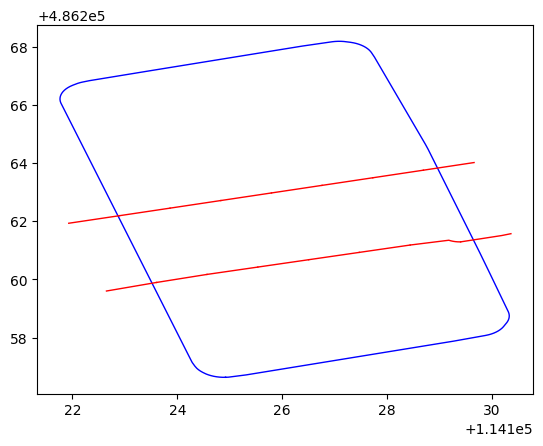

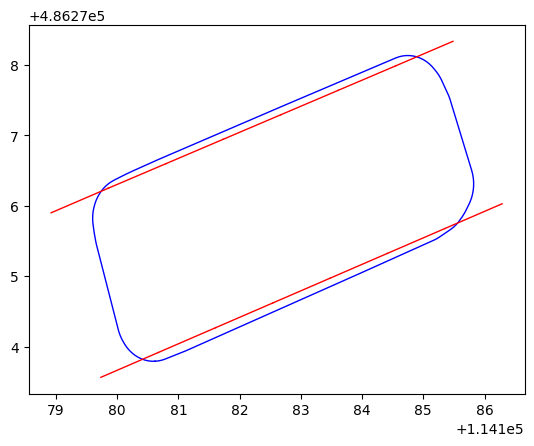

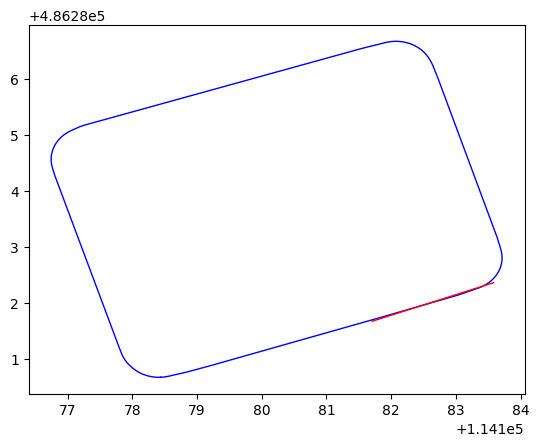

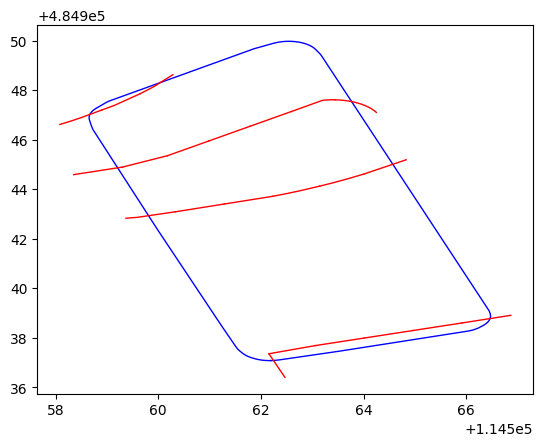

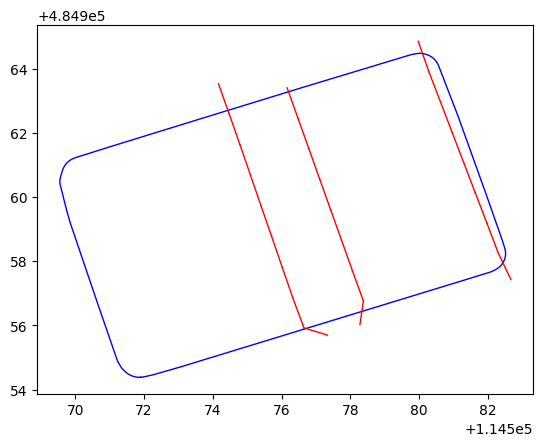

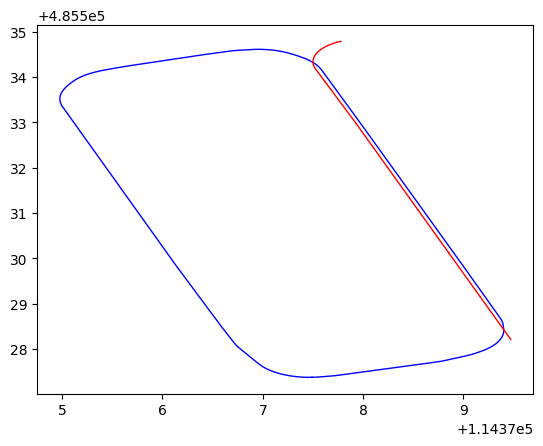

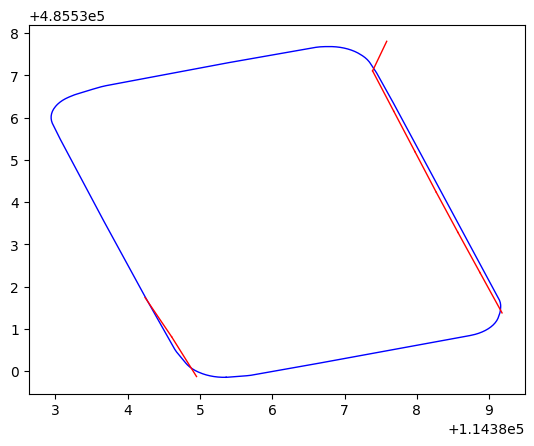

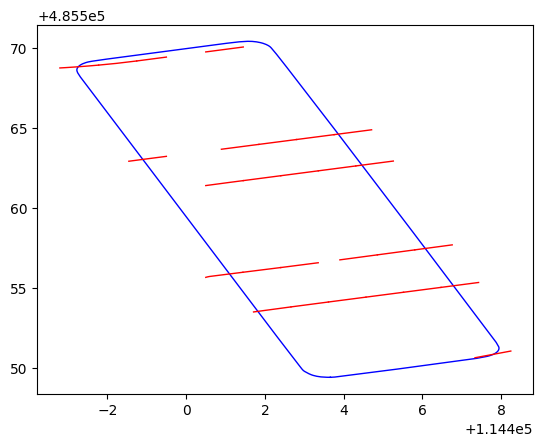

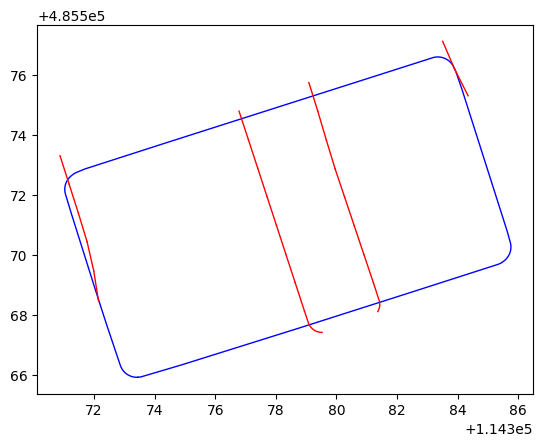

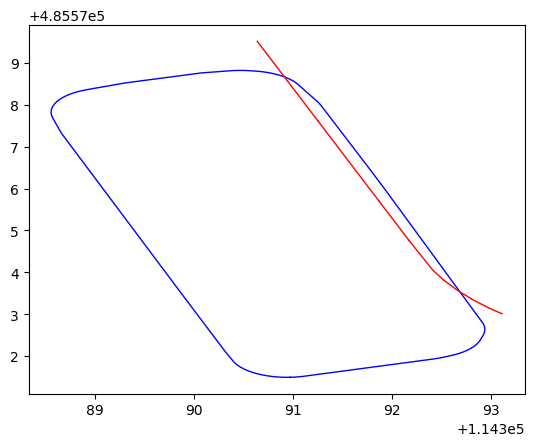

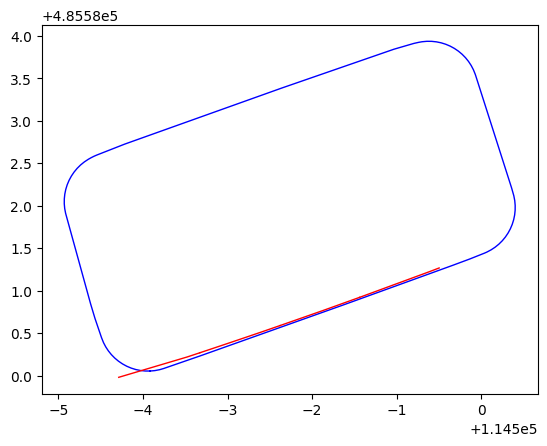

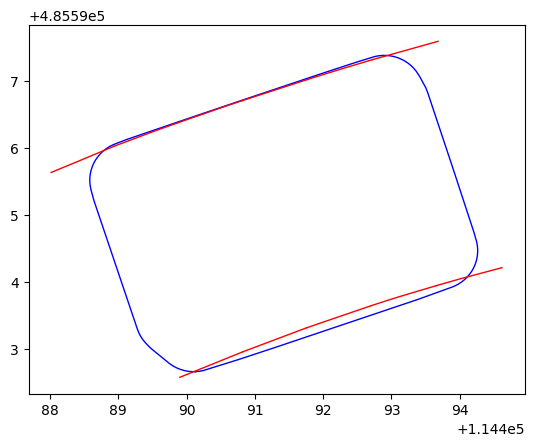

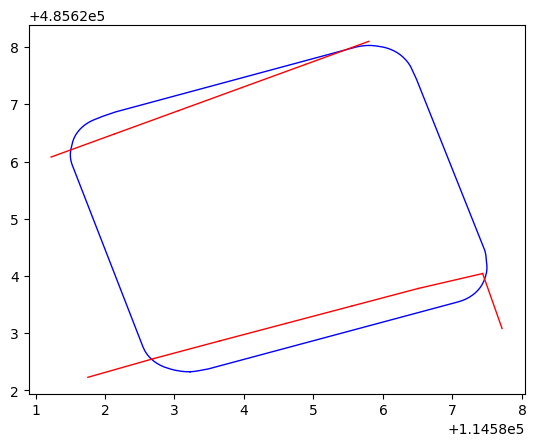

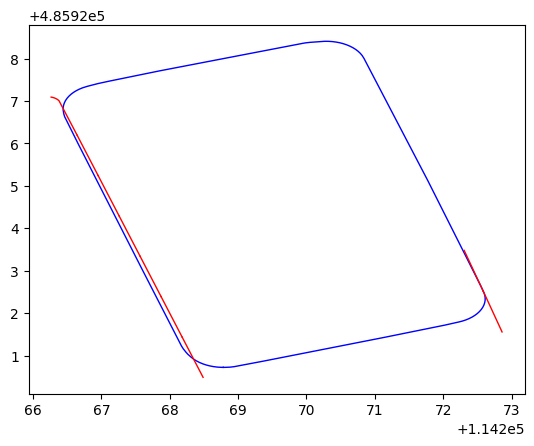

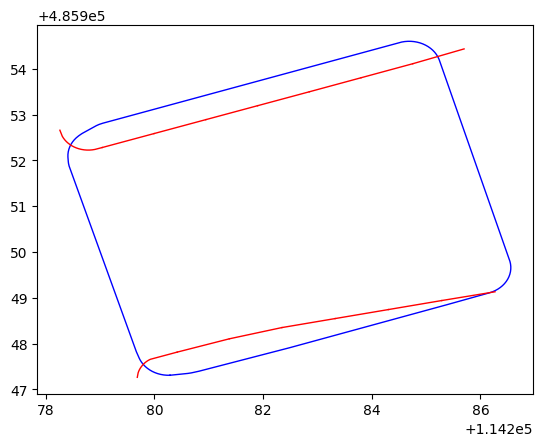

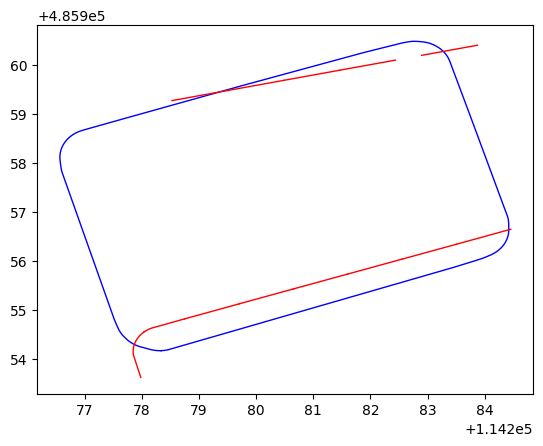

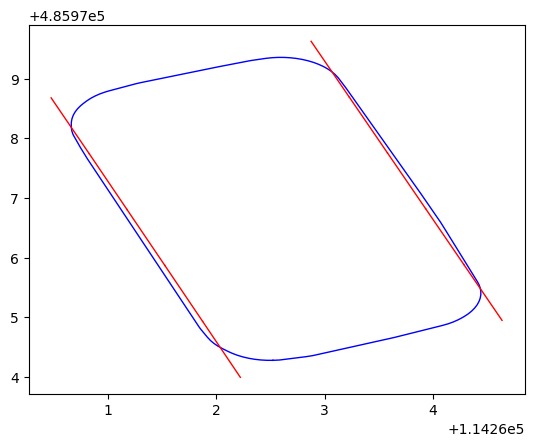

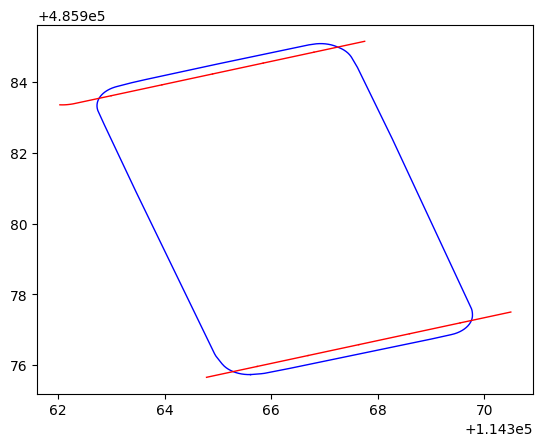

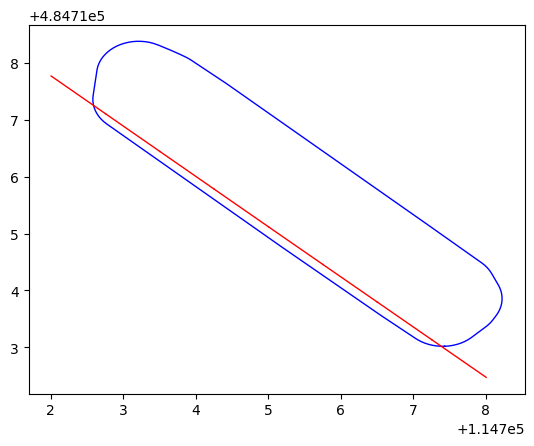

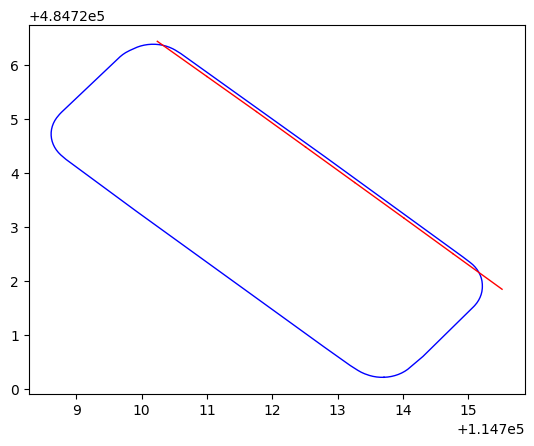

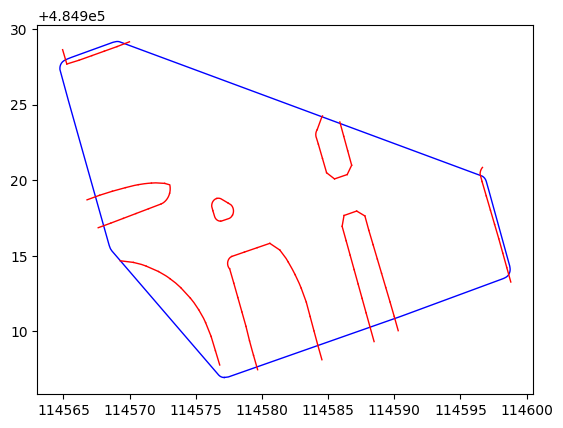

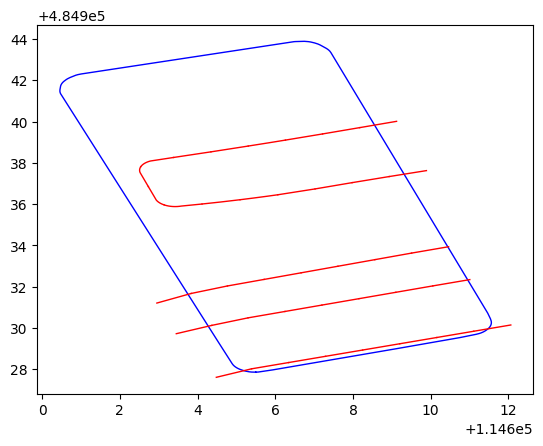

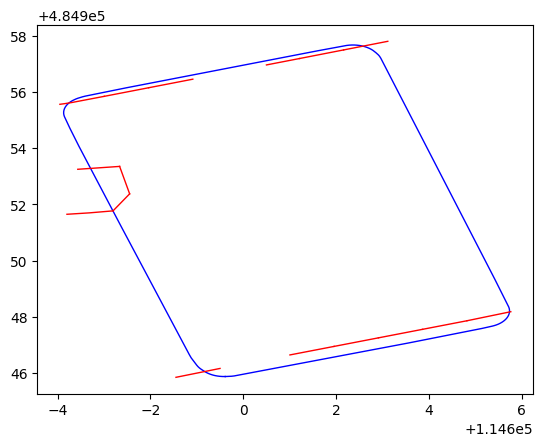

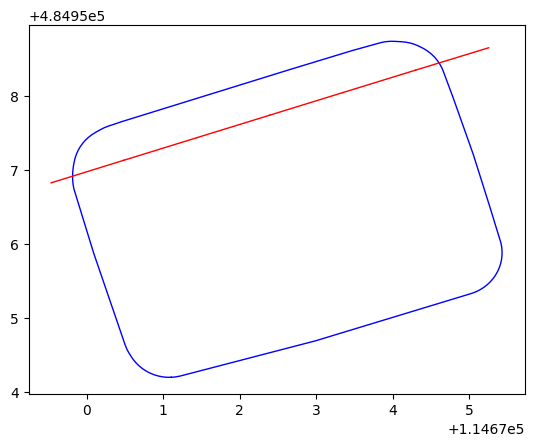

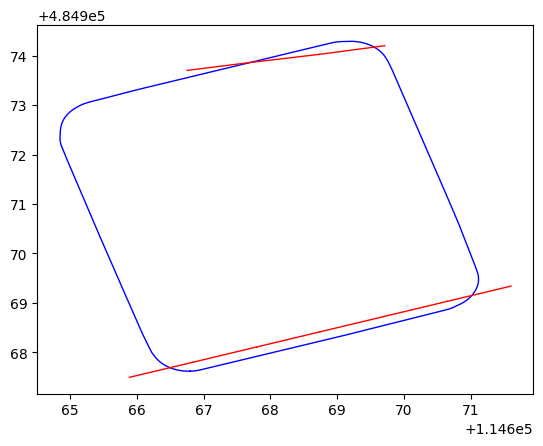

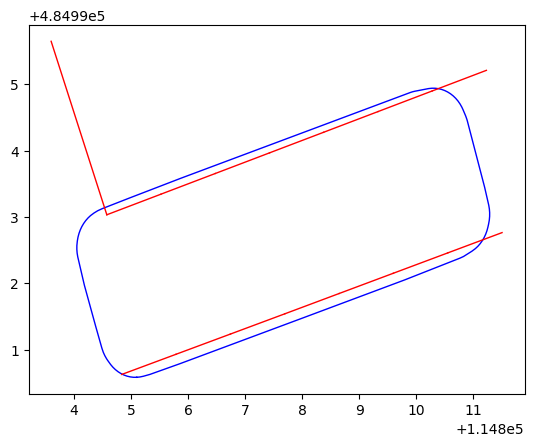

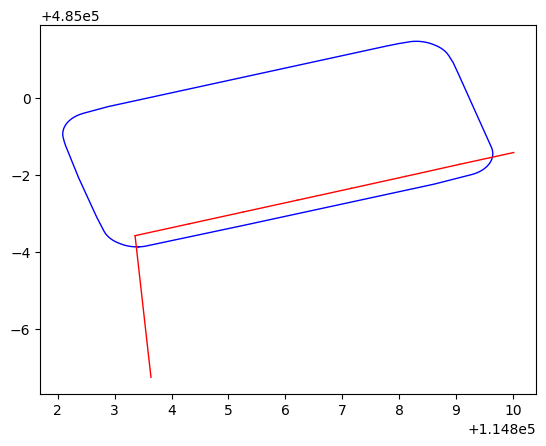

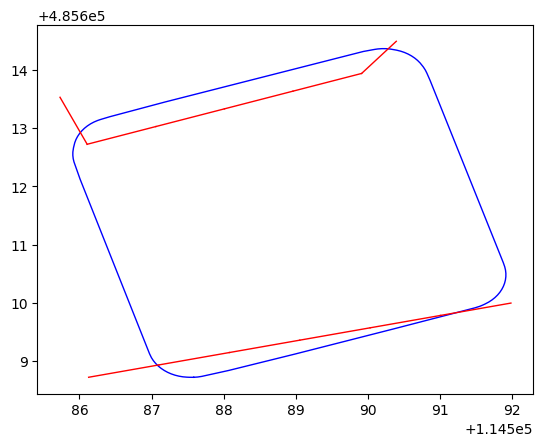

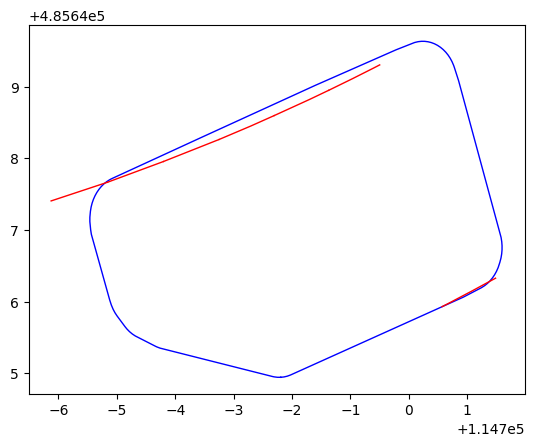

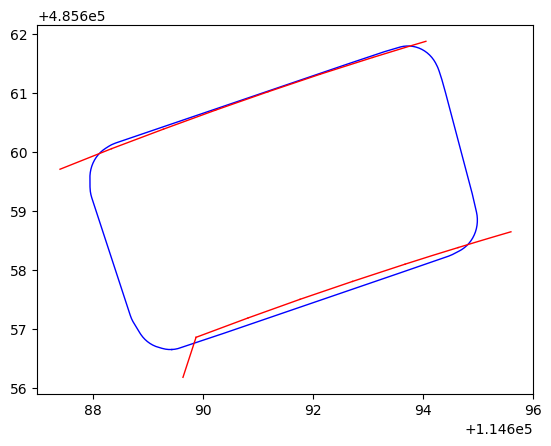

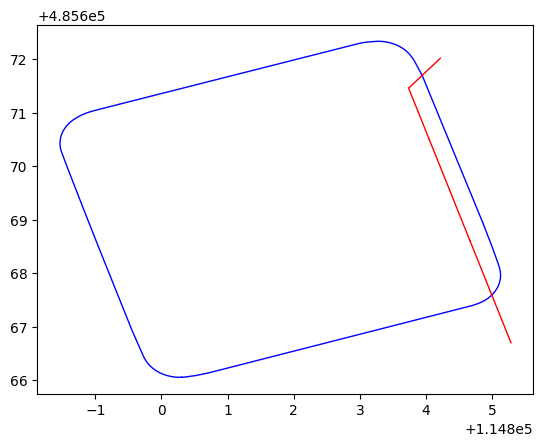

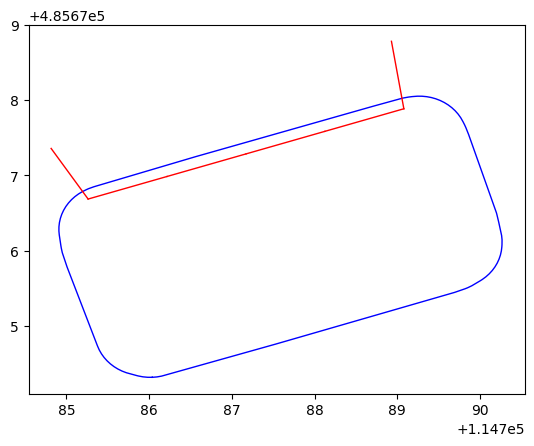

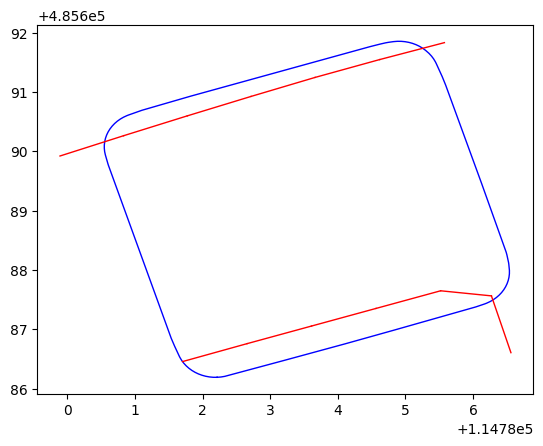

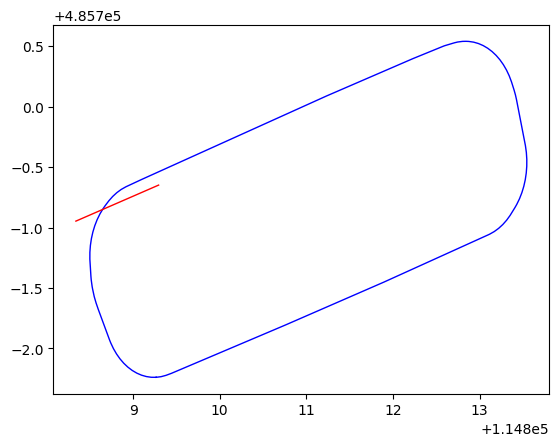

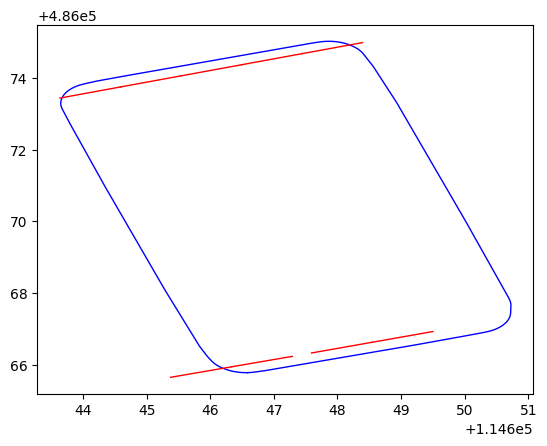

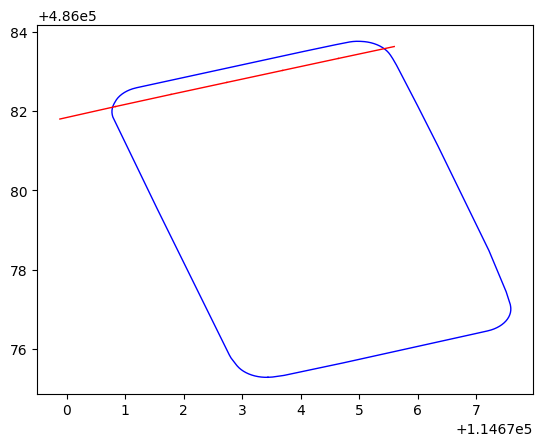

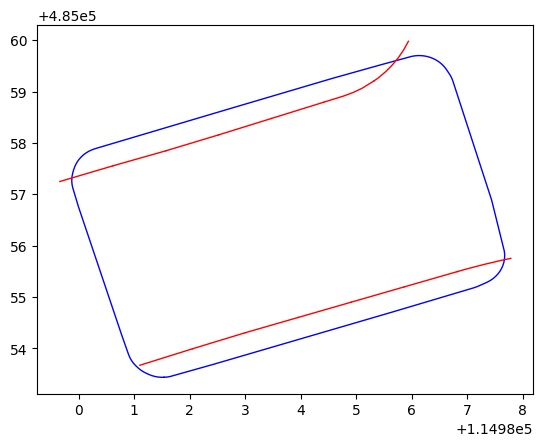

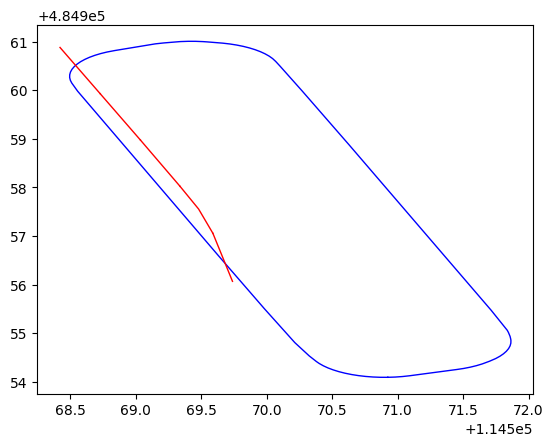

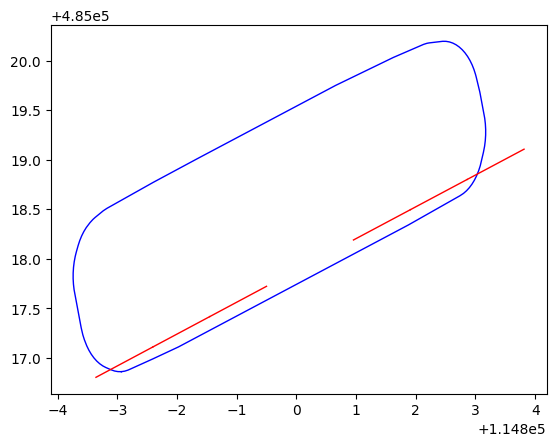

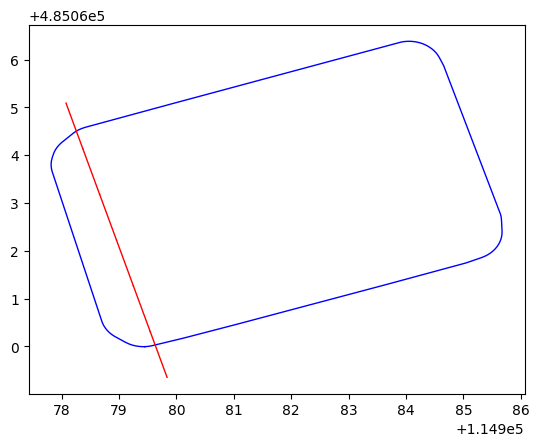

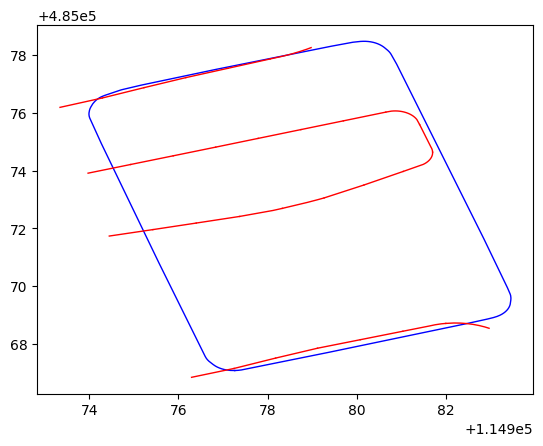

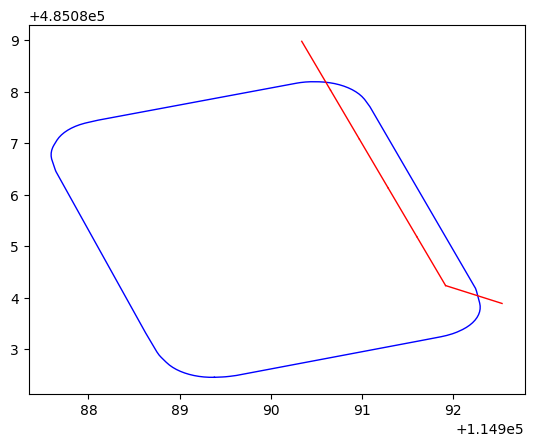

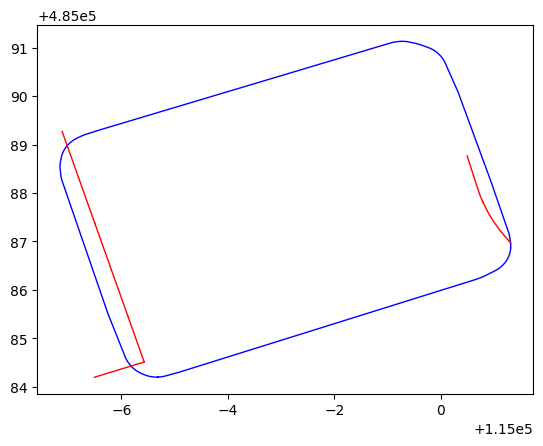

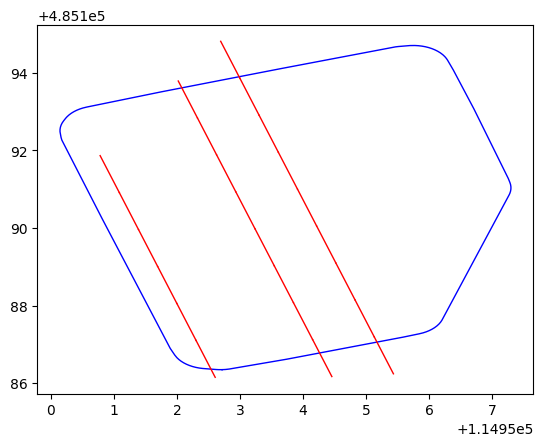

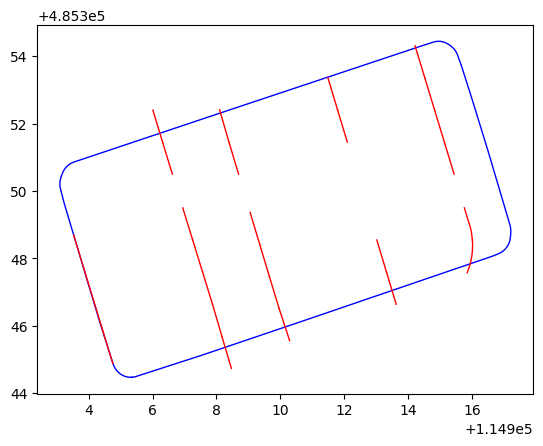

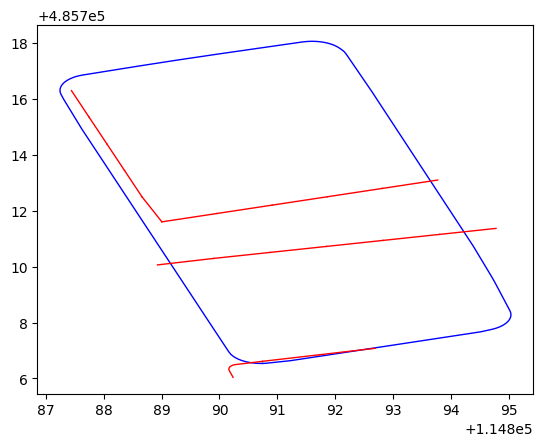

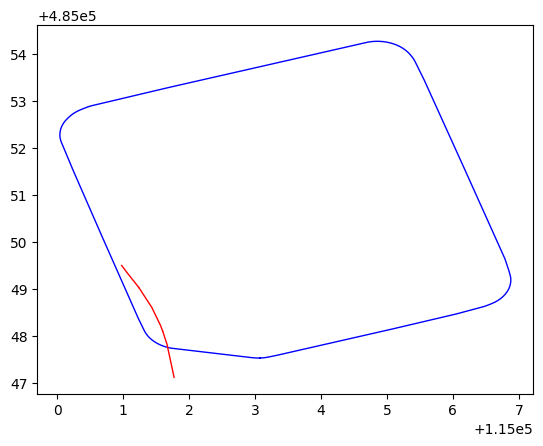

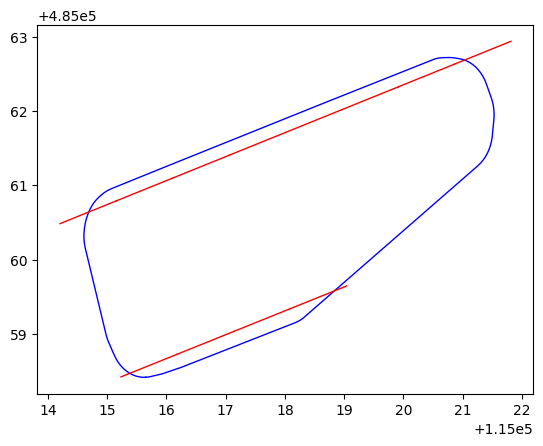

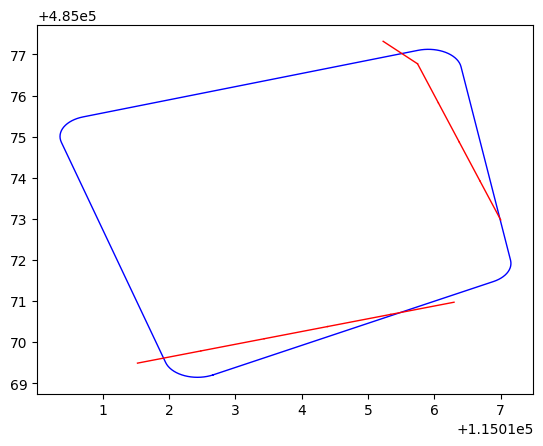

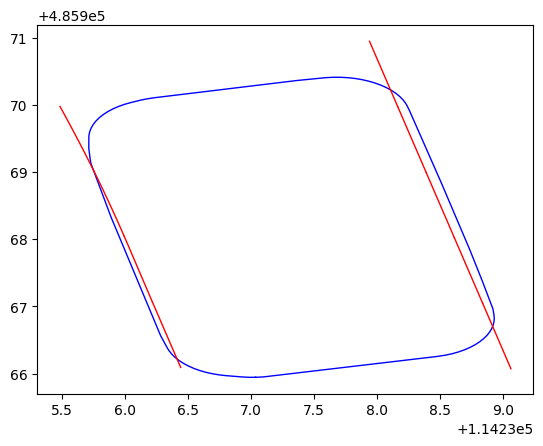

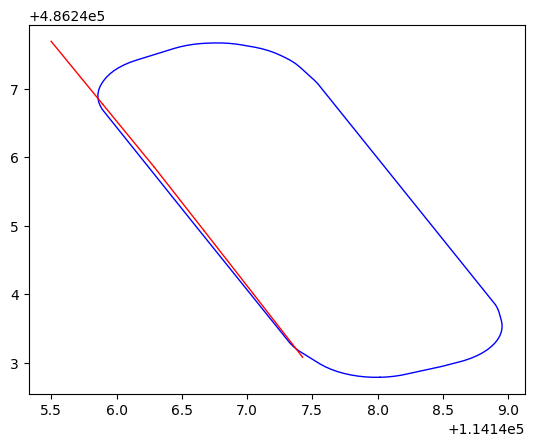

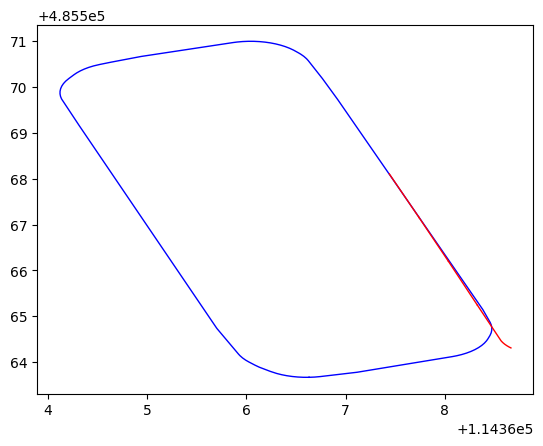

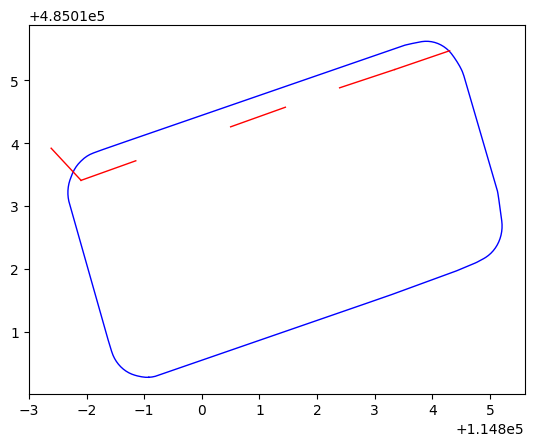

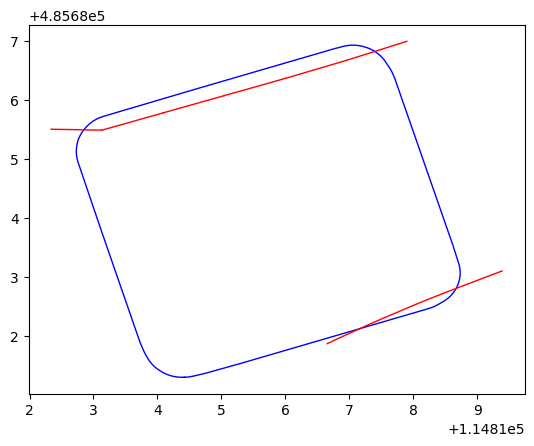

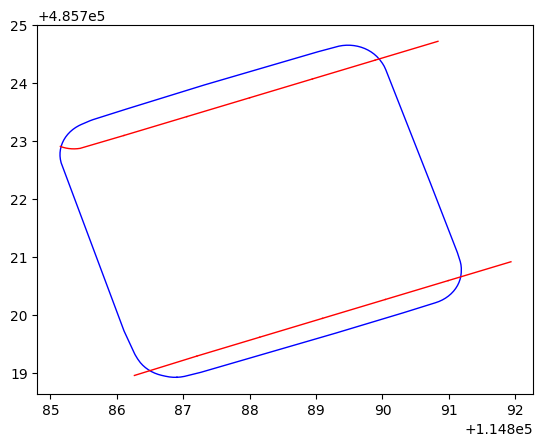

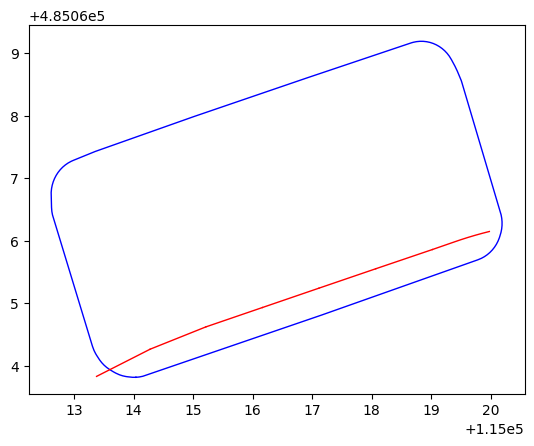

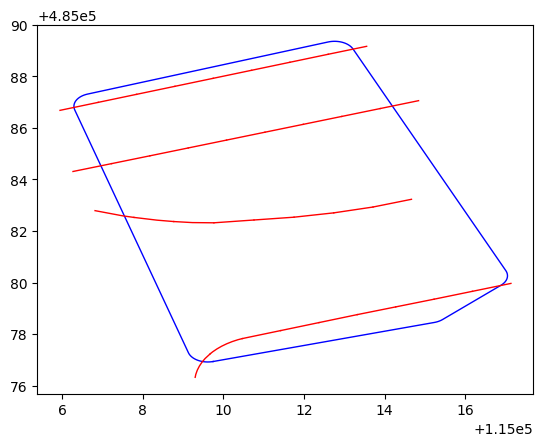

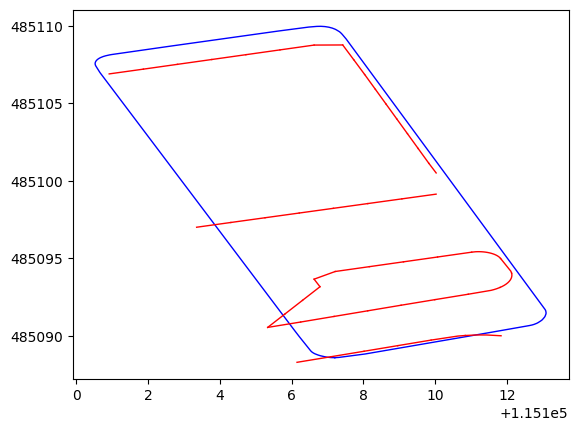

In [82]:
not_matched = []
for ind, row in intersection_buffed_df.iterrows():
    if not len(row['line matches']) > 0:
        not_matched.append(row)
print(len(not_matched))

for ind, row in intersection_buffed_df.iterrows():
    if len(row['line matches']) > 0:
        plot_linematches(row['CW polygon'], row['line matches'])